<a href="https://colab.research.google.com/github/joaoavelaar/Extracao_de_conhecimento_e_mineracao_de_dados/blob/main/Regressao_Linear_Stats_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear - Stats Model - parte 4

In [ ]:

# Aluno: Pedro Henrique Pereira do Nascimento

In [ ]:
# Importe a biblioteca NumPy com um alias (apelido) np
import numpy as np

# Importe a biblioteca Pandas com um alias (apelido) pd
import pandas as pd

# Importe a biblioteca Matplotlib com um alias (apelido) plt
import matplotlib.pyplot as plt

In [ ]:
# Carregue os dados de um arquivo CSV chamado 'Regresao_Linear.csv' usando a biblioteca Pandas
dados = pd.read_csv('Regresao_Linear.csv')

In [ ]:
# Exibindo as primeiras linhas
dados.head()

,X,Y
0,0.00000,-11.656137
1,0.10101,-8.074456
2,0.20202,-16.588246
3,0.30303,-4.275013
4,0.40404,-8.714275


In [ ]:
# Extraia os valores da coluna 'X' como array
X = dados['X'].values

# Extraia os valores da coluna 'Y' como array
Y = dados['Y'].values

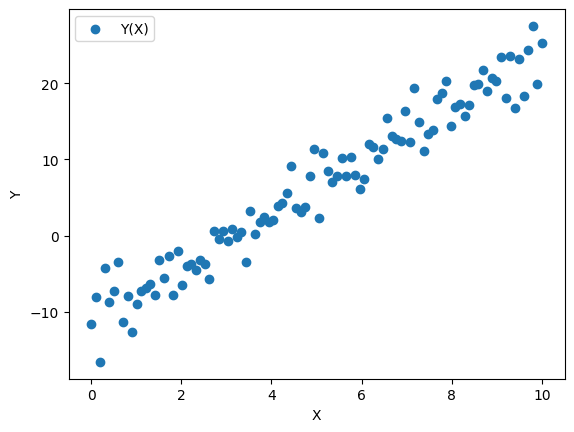

In [ ]:
# Crie um gráfico de dispersão com os dados
plt.scatter(X, Y, label='Y(X)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [ ]:
# Importe a biblioteca statsmodels.api com um alias (apelido) sm
import statsmodels.api as sm

In [ ]:
# Crie um modelo de regressão linear simples usando statsmodels
modelo = sm.OLS(Y, X)

In [ ]:
# Ajuste o modelo aos dados
resultado = modelo.fit()

In [ ]:
# Imprima um resumo do resultado da regressão
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              307.0
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                    4.23e-32
Time:                        18:33:01   Log-Likelihood:                         -322.75
No. Observations:                 100   AIC:                                      647.5
Df Residuals:                      99   BIC:                                      650.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Modelo precisa de um intercepto

In [ ]:
# Adicione uma constante (intercepto) aos dados X
X = sm.add_constant(X)

In [ ]:
# Crie um segundo modelo de regressão linear com a constante adicionada
modelo2 = sm.OLS(Y, X)

In [ ]:
# Ajuste o segundo modelo aos dados
resultado2 = modelo2.fit()

In [ ]:
# Imprima um resumo do resultado do segundo modelo de regressão
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.40e-64
Time:                        18:33:01   Log-Likelihood:                -230.75
No. Observations:                 100   AIC:                             465.5
Df Residuals:                      98   BIC:                             470.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1095      0.488    -22.783      0.0

In [ ]:
# Obtenha os coeficientes linear e angular do segundo modelo
coef_linear, coef_angular = resultado2.params

In [ ]:
# Calcule a reta de ajuste usando os coeficientes obtidos
reta = coef_angular * X + coef_linear

In [ ]:
# Extraia apenas a coluna com os valores de X (removendo a constante)
X = X[:, 1]
reta = reta[:, 1]

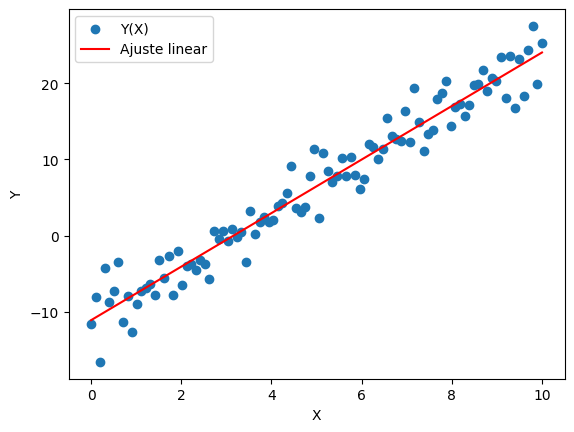

In [ ]:
# Crie um gráfico de dispersão com os dados e a reta de ajuste
plt.scatter(X, Y, label='Y(X)')
plt.plot(X, reta, label='Ajuste linear', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [ ]:
# Importe as métricas de erro médio absoluto (MAE) e erro quadrático médio (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcule o MAE e o RMSE entre os dados reais e a reta de ajuste
MAE = mean_absolute_error(Y, reta)
RMSE = np.sqrt(mean_squared_error(Y, reta))

# Imprima as métricas de erro
print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 1.89
RMSE = 2.43
